## INDEX
```
# Drive Setup -  1 to 4
# Library Installation - 5
# Learning How to work face recognition - 6 to 37
# Exercise(Project) 
```
[Notice:-Side Number is Cell number]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [ ]:
!pwd

In [ ]:
!pip install face_recognition

> learning Phase

In [ ]:
import cv2
import dlib

# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("avenger/shape_predictor_68_face_landmarks.dat")
img = cv2.imread('avenger/thor.jpg')

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)
for face in faces_in_image:

	# assign the facial landmarks
	landmarks = predictor(img_gray, face)

	# unpack the 68 landmark coordinates from the dlib object into a list 
	landmarks_list = []
	for i in range(0, landmarks.num_parts):
		landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

	# for each landmark, plot and write number
	for landmark_num, xy in enumerate(landmarks_list, start = 1):
		cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
		cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)


# visualise the image with landmarks
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2
image=cv2.imread('avenger/thor.jpg') #path of image
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)#HOG conversion fast but not accurate ,cnn model is best
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('input_image')
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,4))#intensity changed
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Hog of Oriented Gradients')
plt.show()

In [ ]:
len(fd)

48240

In [ ]:
image.shape

(1440, 1080, 3)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
!pwd

/content/gdrive/My Drive


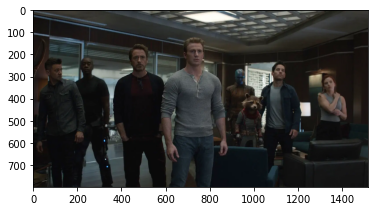

In [ ]:
image=cv2.imread('avenger/avengers.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
import face_recognition
face_locations=face_recognition.face_locations(image)#find face location
number_of_faces=len(face_locations)
print("found {0} faces in images".format(number_of_faces))

found 5 faces in images


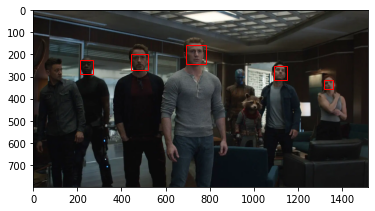

In [ ]:
#get face detect
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='Red')
  ax.add_patch(rect)
plt.show()


In [ ]:
image =cv2.imread('avenger/black_widow.jpg')
black_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image =cv2.imread('avenger/captain.jpg')
captain_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image =cv2.imread('avenger/rdj.jpg')
rdj_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [ ]:
black_demo_encoding=face_recognition.face_encodings(black_demo)[0]
captain_demo_encoding=face_recognition.face_encodings(captain_demo)[0]
rdj_demo_encoding=face_recognition.face_encodings(rdj_demo)[0]

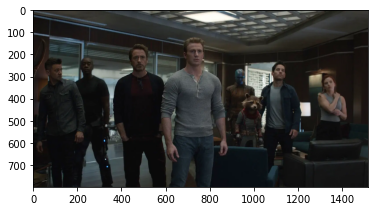

In [ ]:
image=cv2.imread('avenger/avengers.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [ ]:
known_face_encodings=[
                     black_demo_encoding,
                     rdj_demo_encoding,
                     captain_demo_encoding
]

In [ ]:
from scipy.spatial import distance
for unknown_face_encoding in unknown_face_encodings:
  result=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    result.append(d)
  print(result)
  thresold=0.64
  result=np.array(result) <= thresold
  print(result)
  name="Unknown"
  if result[0]:
    name="black"
  elif result[1]:
    name="rdj"
  elif result[2]:
    name="captain"
  print(name)

In [ ]:
import face_recognition
image =cv2.imread('avenger/thor.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
face_landmarks_list=face_recognition.face_landmarks(image)
print(face_landmarks_list)

[{'chin': [(245, 607), (251, 686), (263, 768), (278, 848), (306, 923), (357, 985), (419, 1035), (492, 1070), (570, 1078), (641, 1064), (699, 1016), (748, 957), (782, 892), (799, 816), (809, 739), (816, 659), (819, 583)], 'left_eyebrow': [(303, 589), (343, 550), (403, 540), (463, 547), (522, 567)], 'right_eyebrow': [(578, 562), (629, 539), (682, 529), (735, 536), (769, 569)], 'nose_bridge': [(550, 601), (554, 648), (556, 697), (559, 748)], 'nose_tip': [(495, 777), (524, 788), (557, 797), (590, 787), (620, 774)], 'left_eye': [(381, 606), (412, 593), (445, 593), (475, 608), (444, 612), (412, 612)], 'right_eye': [(622, 601), (652, 585), (683, 586), (712, 597), (684, 603), (654, 603)], 'top_lip': [(435, 872), (482, 863), (525, 859), (561, 865), (594, 856), (632, 857), (676, 861), (661, 865), (595, 873), (562, 879), (525, 876), (451, 875)], 'bottom_lip': [(676, 861), (636, 891), (599, 908), (564, 914), (526, 913), (482, 902), (435, 872), (451, 875), (525, 879), (562, 882), (595, 876), (661, 

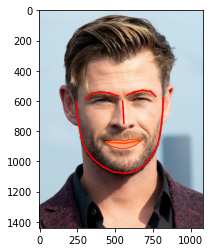

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts=face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y

  right_eyebrow_pts=face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  
  right_eyebrow_pts=face_landmarks['nose_bridge']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  
  right_eyebrow_pts=face_landmarks['chin']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  
  p=Polygon(face_landmarks['top_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(p)
  p=Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon',edgecolor='orangered')
  ax.add_patch(p)
plt.show()



> End Learning block

>Start Project

**Project Defination**   
---
**Python Face Recognition on Video**

Note:- Use Gpu(Runtime >> change runtime type >> Gpu)

In [ ]:
!pwd

/content


0
6 6


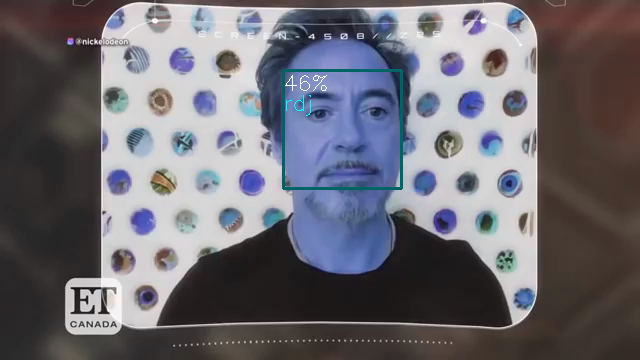

1
6 6


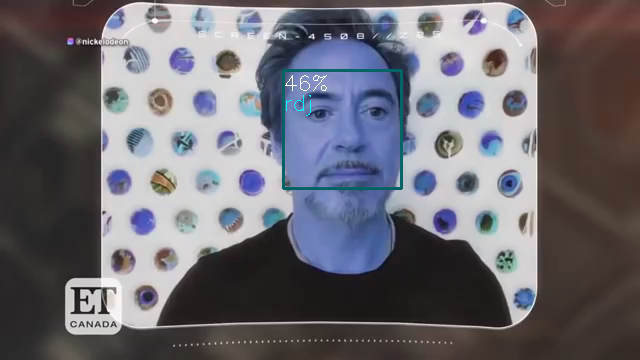

2
6 6


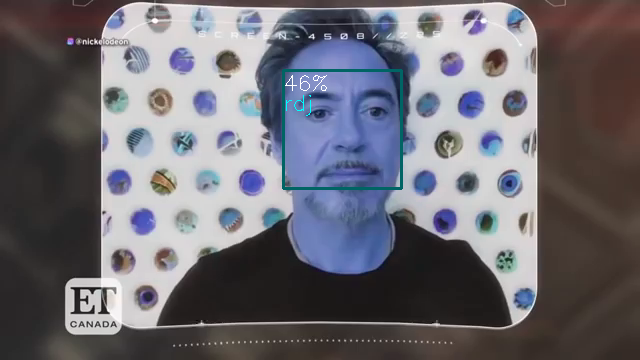

3
6 6


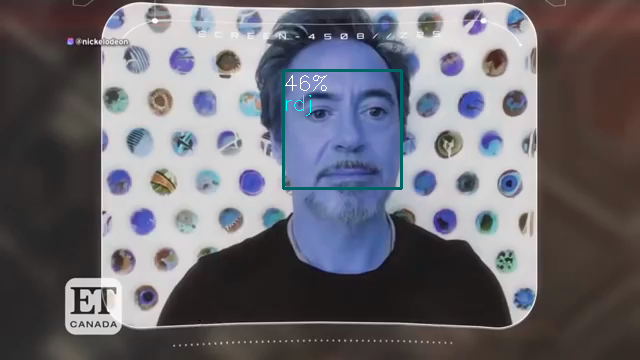

4
6 6


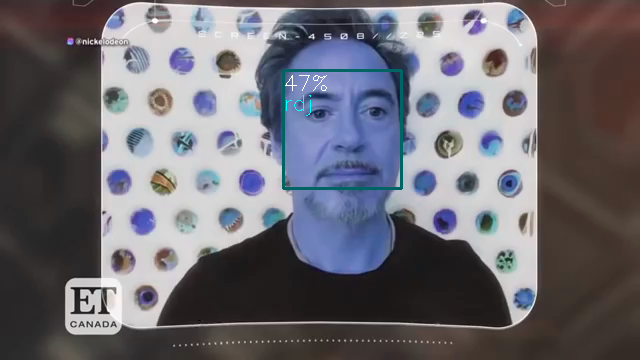

5
6 6


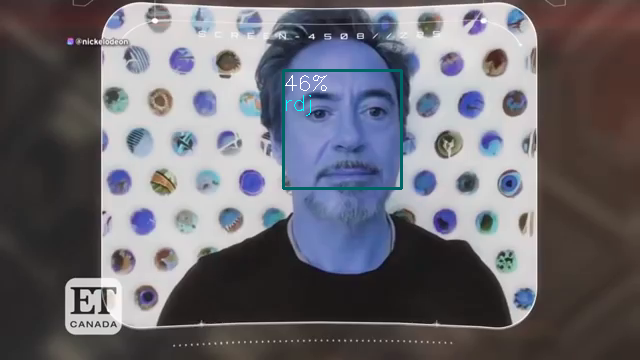

6
6 6


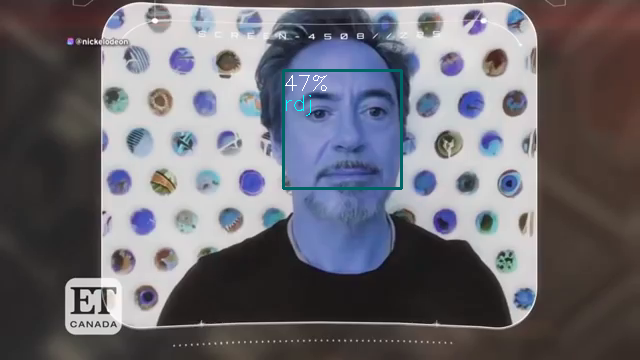

7
6 6


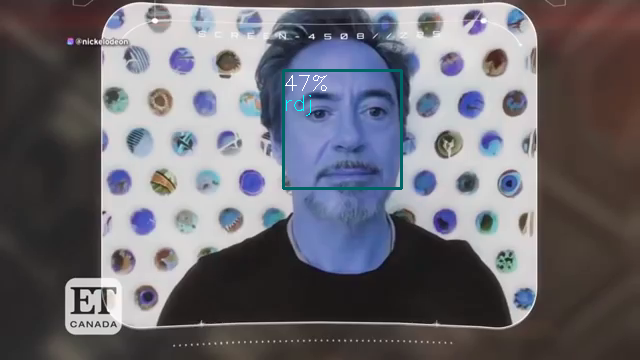

8
6 6


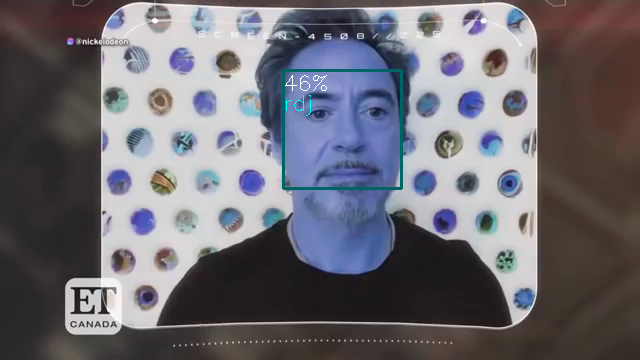

9
6 6


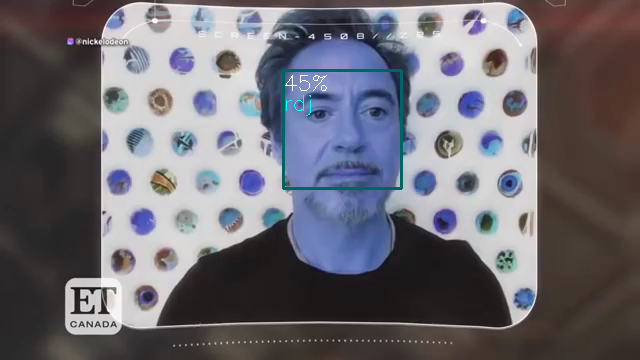

10
6 6


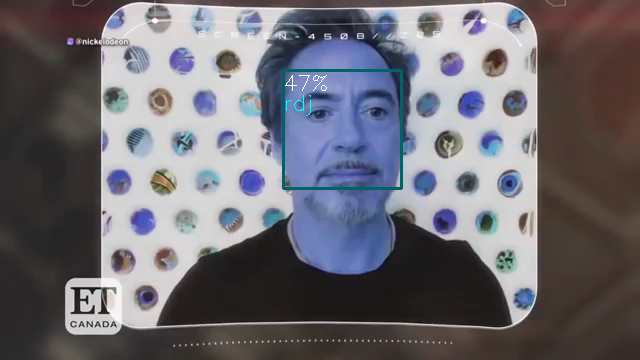

11
6 6


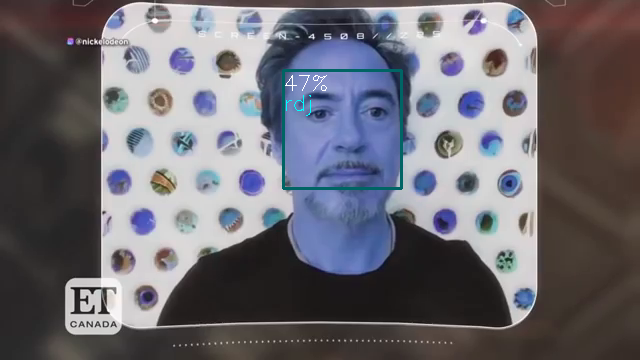

12
6 6


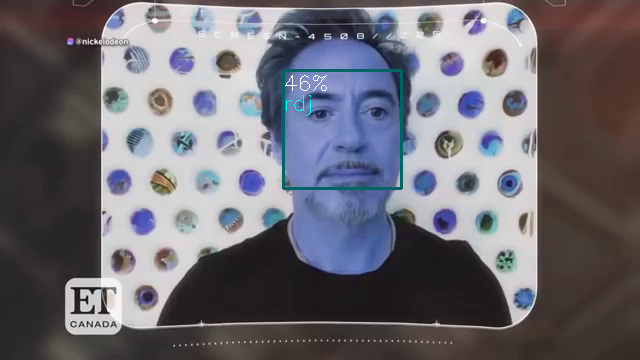

13
6 6


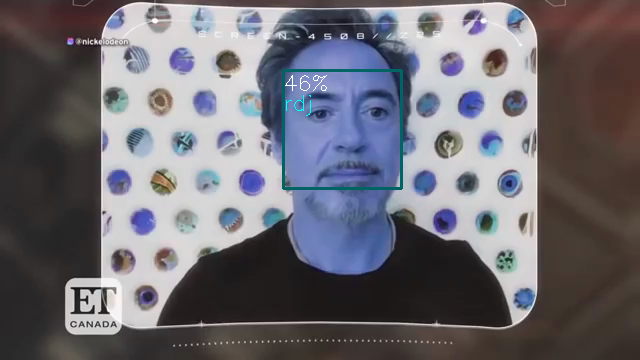

14
6 6


In [ ]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
video_capture = cv2.VideoCapture("avenger/avengers.mp4") # read video on drive
length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
start_frame_number = 1 #start frame number
video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame_number)#set starting frame
width  = video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)  # get float value of width
height = video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT) # get float value of height    
face_locations = []
count=-1
video_name = 'final.mp4' #save video on drive
codec = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(video_name, codec, 29, (int(width),int(height)))
temp=0
for count in range(50):
    if temp==0:
      print(count)
      ct=0
      ret, frame = video_capture.read()#staring read a frame
      #frame = cv2.resize(frame, (780, 540),  interpolation = cv2.INTER_NEAREST) 
      rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      x_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      face_locations = face_recognition.face_locations(rgb_frame,model="cnn")
      print(len(fb),len(face_recognition.face_encodings(x_frame,fb)))
      for top, right, bottom, left in face_locations:
        frame_encode=face_recognition.face_encodings(x_frame,face_locations)[ct]#get encoding of faces in images    
        x,y,w,h=left,top,right,bottom
        cv2.rectangle(rgb_frame,(x,y),(w,h),(100,100,0),2)#set rectangle
        name,percent=encoding_compare_with_frame(frame_encode)#comapre frame to our database
        p=str(percent)+"%"
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(rgb_frame,p,(x,y+20), font, 0.7,(255,255,255),1)
        cv2.putText(rgb_frame,name,(x,y+40), font, 0.7,(255,255,0),1)
        ct=ct+1
      cv2_imshow(rgb_frame)
      video.write(rgb_frame)
    else:
      temp=temp+1
    if temp==18:
      temp=0
    
    
# Release handle to the webcam
cv2.destroyAllWindows()
video.release()
video_capture.release()


In [ ]:
def get_encoding_known_database_images(imagePath):
  global width
  global height
  image=cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(image,number_of_times_to_upsample=1,model="cnn")
  known_image_encoding = face_recognition.face_encodings(rgb)
  return known_image_encoding


In [ ]:
# with path
list_known_images=['avenger/thor.jpg',
                   'avenger/rdj.jpg',
                   'avenger/hulk.jpg',
                   'avenger/clint.jpg',
                   'avenger/captain.jpg',
                   'avenger/black_widow.jpg',
                   'avenger/locky.jpg',
                   'avenger/fury.jpg'
]
list_known_images_name=['thor','rdj','hulk','clint','captain','black widow','locky','fury']

In [ ]:
#both video frame and known image are same dimension
from scipy.spatial import distance
import numpy as np
def encoding_compare_with_frame(frame_encode):
    result=[]
    for u in range(len(list_known_images)):
      video_encode=get_encoding_known_database_images(list_known_images[u])[0]
      d=distance.euclidean(video_encode,frame_encode)
      result.append(d)
    if min(result)<0.7:
      return list_known_images_name[result.index(min(result))],(100-int(min(result)*100))
    else:
      return "unpredicted",0

